## Load and plot Templeton ephys data

In [2]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor

%matplotlib notebook

In [3]:
#Set paths to experiment folders
main_path = [
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-26_14-09-36_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-27_13-57-17_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-08-02_15-40-19_620264\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-19_13-48-26_628801\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-26_12-48-09_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-27_11-37-08_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-05_13-08-02_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-06_12-35-35_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-17_11-39-17_646318\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-18_10-44-55_646318\processed",
    r"Y:\2023-02-27_08-14-30_649944\processed",
    r"Y:\2023-02-28_09-33-43_649944\processed",
    # DR mice
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",   
]

mouseIDs = ['620263','620263','620264','628801','636397','636397','644547','644547',
            '646318','646318','649944','649944',
           #DR mice
           '626791','626791','626791',
           '644867','644867','644867','644867',]
exp_nums = [1,2, 1, 1, 1,2, 1,2, 
            1,2, 1,2, 
           #DR mice
           1,2,3,
           1,2,3,4]

### Load/initialize data from one session

In [24]:
sel_session=0
session=Session(path=main_path[sel_session]) 
session.assign_unit_areas()

probeB areas found
probeC areas found
probeF areas found


In [25]:
print(session.metadata['mouseID']+' session ',session.metadata['ephys_session_num'])

620263 session  1


In [28]:
# trials table
session.trials

,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,aud_false_alarm_trials,aud_miss_trials,aud_correct_reject_trials,aud_autoreward_trials,catch_trials,catch_resp_trials,trialStimStartFrame,stimStartTime,stimLatency,trial_stim_dur
0,0,vis1,vis1,True,True,0.00,0.5,True,False,False,...,False,False,False,False,False,False,238,112.733125,0.020675,0.50
1,419,vis1,vis1,True,True,0.00,1.0,True,False,False,...,False,False,False,False,False,False,531,117.620575,0.020675,1.00
2,712,vis1,vis1,True,True,0.00,0.5,True,False,False,...,False,False,False,False,False,False,812,122.309625,0.022505,0.50
3,993,vis1,vis1,True,True,0.00,1.0,True,False,False,...,False,False,False,False,False,False,1127,127.564025,0.022505,1.00
4,1308,vis1,vis1,True,True,0.00,0.5,True,False,False,...,False,False,False,False,False,False,1404,132.184510,0.022560,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,214241,sound2,vis1,False,False,1.00,0.0,False,False,False,...,False,False,True,False,False,False,214334,3702.811468,0.021687,1.00
669,214515,sound2,vis1,True,False,0.50,0.0,False,False,False,...,True,False,False,False,False,False,214634,3707.841478,0.014208,0.50
670,214815,sound1,vis1,False,False,0.75,0.0,False,False,False,...,False,True,False,False,False,False,214915,3712.561567,0.013687,0.75
671,215096,sound1,vis1,False,False,1.00,0.0,False,False,False,...,False,True,False,False,False,False,215358,3720.021697,0.017667,1.00


In [27]:
# units table
session.units

,quality,cluster_id,probe,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,area
id,,,,,,,,,,,,,,,,,,,,,
2207261420000,mua,0,B,2.980486,0.99,0.178932,0.500000,NaN,NaN,NaN,...,0.604355,0.247236,0.221087,0.151191,-0.011883,17.603820,80.0,2.027598,NaN,DG-mo
2207261420001,mua,1,B,0.356302,0.68,3.910602,0.004021,NaN,NaN,NaN,...,0.315913,0.137353,0.221294,1.037086,-0.010299,252.987345,40.0,0.343384,-1.373534,DG-mo
2207261420002,good,2,B,3.828723,0.99,0.000000,0.010085,34.409595,0.159389,3.846623,...,0.219765,0.137353,1.276433,0.567786,-0.119145,124.567365,70.0,-0.809404,NaN,DG-mo
2207261420003,mua,3,B,0.109937,0.67,0.000000,0.017969,75.911772,0.000046,8.384570,...,0.563149,0.164824,0.334257,0.395225,-0.046358,125.869446,70.0,0.274707,-0.686767,DG-mo
2207261420004,mua,4,B,7.191738,0.98,2.021784,0.500000,615.015116,0.006297,3.757930,...,0.796650,0.480737,0.388293,0.041828,-0.000954,30.640545,120.0,2.655500,1.922948,DG-mo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207261460511,good,511,F,2.614897,0.99,0.058084,0.010156,34.837735,0.142946,4.099546,...,0.700503,0.164824,0.448092,0.302047,-0.048817,109.370820,60.0,1.030151,0.000000,MOs5
2207261460512,mua,512,F,0.276298,0.97,0.000000,0.027002,13.925099,6.464554,2.749505,...,0.631826,0.219765,0.551956,0.357042,-0.065306,175.805565,70.0,0.215841,0.686767,MOs5
2207261460513,good,513,F,0.149143,0.23,0.000000,0.000460,93.290306,0.196207,6.801480,...,0.755444,0.219765,0.247831,0.632180,-0.004143,192.478508,40.0,2.060302,0.686767,MOs2/3


In [15]:
# spike times from one unit
session.spike_times[session.units.index[0]]

array([  20.40218981,   22.02671824,   22.0522515 , ..., 4783.56908633,
       4783.78928566, 4784.86091576])

In [16]:
# information about each frame
session.frames

,vsyncTimes,frameDelay,runningSpeed
0,1126.55803,0.020970,0.000000
1,1126.57464,0.020970,13.813190
2,1126.59137,0.022575,14.892346
3,1126.60800,0.022575,17.050657
4,1126.62468,0.022595,17.482319
...,...,...,...
216970,4767.85044,0.022460,33.237989
216971,4767.86711,0.022460,33.885482
216972,4767.88383,0.022235,34.101313
216973,4767.90087,0.022235,33.885482


In [17]:
session.rf_trials

,trialsX,trialsY,trialGratingOri,stimStartFrame,trialAMNoiseFreq,trialToneFreq,trialFullFieldContrast,trialStimType,stimStartTime,stimLatency
0,-798.722753,146.240918,45.0,0,NaN,NaN,NaN,vis,90.366700,0.020890
1,798.722753,-438.722753,45.0,31,NaN,NaN,NaN,vis,90.883720,0.020890
2,NaN,NaN,NaN,62,80.0,NaN,NaN,sound,91.415277,0.035167
3,NaN,NaN,NaN,93,NaN,13000.0,NaN,sound,91.965280,0.068250
4,NaN,NaN,NaN,124,NaN,16000.0,NaN,sound,92.485082,0.070812
...,...,...,...,...,...,...,...,...,...,...
1651,798.722753,438.722753,270.0,51181,NaN,NaN,NaN,vis,947.797995,0.022515
1652,NaN,NaN,NaN,51212,NaN,NaN,1.0,vis,948.315100,0.022550
1653,NaN,NaN,NaN,51243,NaN,12000.0,NaN,sound,948.877022,0.067292
1654,-479.233652,438.722753,45.0,51274,NaN,NaN,NaN,vis,949.366010,0.022560


### Create a convenient data array using "xarray"

In [18]:
# loop through sessions and make unit xarrays
time_before_flash = 0.5
trial_duration = 2
bin_size = 0.001


# Make tensor (3-D matrix [units,time,trials])
trial_tensor = make_neuron_time_trials_tensor(session.good_units, session.spike_times, 
                                              session.trials,time_before_flash, trial_duration, 
                                              bin_size)

# make xarray
session.trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                           coords={
                               "unit_id": session.good_units.index.values,
                               "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                               "trials": session.trials.index.values
                               })

### Plot unit density across probes

In [ ]:
probes = session.good_units['probe'].unique()
ch_bins=np.arange(0,384,8)

units_by_channel = session.good_units[['probe','peak_channel']].value_counts()

fig,ax=plt.subplots(1,len(probes))

for ip,pr in enumerate(probes):
    unit_hist,edges=np.histogram(units_by_channel[pr].sort_index().index,bins=ch_bins)
    ax[ip].plot(unit_hist,ch_bins[:-1])
    ax[ip].set_ylim([0,384])
    ax[ip].set_xlabel('n units')
    ax[ip].set_title('Probe'+pr)
    if ip>0:
        ax[ip].set_yticklabels([])
    else:
        ax[ip].set_ylabel('channel')
        

In [ ]:
#estimate fraction of units in cortex


#input channel rage and probe, caculate the fraction of units contained there
sel_probe='F'
channel_range=[120,350]

units_in_range=len(session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]'))

probe_units=len(session.good_units.query('probe == @sel_probe'))

print('Probe'+sel_probe+' fraction units in channel range:')
print(units_in_range/probe_units)



### Plot rasters -- sorted by stimulus duration

In [ ]:
#Plot rasters: sort by stimulus duration

#select unit either by its location in the unit table or its ID    
unit_id=session.good_units.index[145]
# unit_id=10121

fig,ax=plt.subplots(2,2,figsize=(8,7))
ax=ax.flatten()
stim_types=['vis1','vis2','sound1','sound2']

color_options = ['green','blue','red','orange']

trial_color_map = {}
for ii,ss in enumerate(stim_types):
    trial_color_map[ss]=color_options[ii]


for si,ss in enumerate(stim_types):
    stim_trials = session.trials[session.trials['trialStimID']==ss]
    stim_trials_sorted = stim_trials.sort_values(by='trial_stim_dur',axis=0,ascending=True)
    
    sel_trials = session.trial_da.sel(trials=stim_trials_sorted.index.values)
    
    #find the ilocs of block transitions
    sel_trials_table = session.trials.loc[stim_trials.index.values]
    column_changes = sel_trials_table['trialstimRewarded'].shift() != sel_trials_table['trialstimRewarded']
    block_changes = sel_trials_table[column_changes]
    
    for it,tt in enumerate(sel_trials.trials.values):
        trial_spikes = sel_trials.sel(unit_id=unit_id,trials=tt)
        trial_color=[]

        trial_color = trial_color_map[session.trials['trialStimID'][tt]]

        trial_spike_times = trial_spikes.time[trial_spikes.values.astype('bool')]
        ax[si].vlines(trial_spike_times,ymin=it,ymax=it+1,linewidth=0.75,color='k')
        
        ax[si].vlines(stim_trials_sorted['trial_stim_dur'].loc[tt],ymin=it-.01,ymax=it+1.01,linewidth=1,color='k')

    if len(block_changes)>1:
        if block_changes.iloc[0]['trialstimRewarded']=='vis1':
            start_block=1
        elif block_changes.iloc[0]['trialstimRewarded']=='sound1':
            start_block=0

        for xx in np.asarray([0,2,4])+start_block:
            start_iloc=sel_trials_table.index.get_loc(block_changes.index[xx])
            if (xx+1)>(len(block_changes)-1):
                end_iloc=len(sel_trials_table)
            else:
                end_iloc=sel_trials_table.index.get_loc(block_changes.index[xx+1])
            temp_patch=patches.Rectangle([-0.5,start_iloc],1.5,end_iloc-start_iloc,
                                        color=[0.5,0.5,0.5],alpha=0.15)
            ax[si].add_patch(temp_patch)
        
    ax[si].set_xlim([-0.5,1.5])

    ax[si].axvline(0,color='k',linewidth=1)

    ax[si].set_title(ss)

fig.suptitle('unit:'+str(unit_id)+' Probe'+session.good_units['probe'].loc[unit_id]+
             ' ch:'+str(session.good_units['peak_channel'].loc[unit_id]))

fig.tight_layout()



### Plot heatmaps

In [19]:
#Average & normalize responses of each unit to each stimulus
gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T
    
    for iu in range(0,len(session.trial_da.unit_id)):
        unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                gwindow,mode='same')/np.sum(gwindow)

In [20]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

<IPython.core.display.Javascript object>


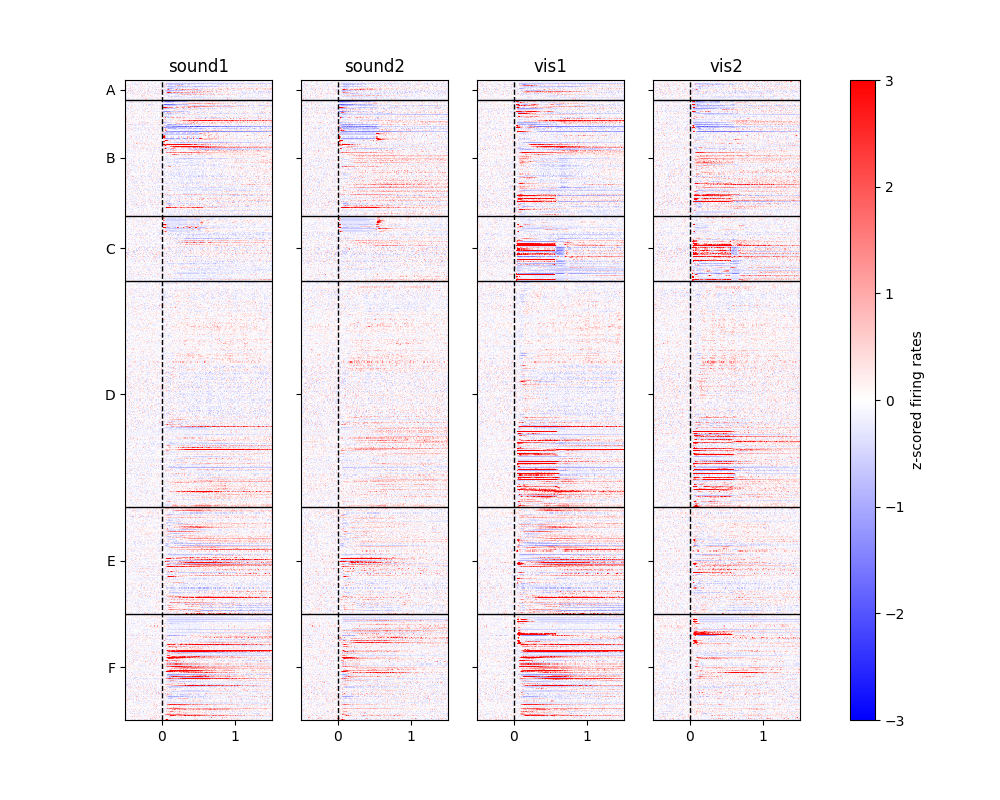

Text(0, 0.5, 'z-scored firing rates')

In [21]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

fig,ax=plt.subplots(1,4,figsize=(10,8))
for xx in range(0,len(stimuli)): 
    im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                   cmap=plt.get_cmap('bwr'),interpolation='none',
                   extent=(-time_before_flash,trial_duration-time_before_flash,
                           0,unit_frs_by_stim.shape[0]))
    
    ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
    ax[xx].set_title(stimuli[xx])
    ax[xx].set_xlim(-0.5,1.5)
    ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                   color='k',linewidth=1)
    ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
    ax[xx].set_yticklabels(probe_labels)
    if xx>0:
        ax[xx].set_yticklabels([])

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('z-scored firing rates')


### Plot heatmaps by stimulus duration

In [ ]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

In [ ]:
#Average & normalize responses of each unit to each stimulus

gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#find stimulus durations
stim_dur = session.trials['trial_stim_dur'].unique()
#remove duration = 0 for this plot
stim_dur = stim_dur[stim_dur!=0]

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli),len(stim_dur)))

#loop through stimulus durations
for dd,dur in enumerate(stim_dur):
    #normalize each unit's avg FRs to its baseline  FR
    for ss,stim in enumerate(stimuli):
        
        stim_trials = (session.trials.query('trialStimID==@stim and trial_stim_dur==@dur')).index.values
        
#         baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.1),trials=stim_trials).mean(dim=["time"])
#         baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
#         baseline_std=baseline_mean_per_trial.std(dim="trials").values
        
        unit_frs_by_stim[:,:,ss,dd] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values

        # z-score each unit rel to its baseline
        unit_frs_by_stim[:,:,ss,dd] = ((unit_frs_by_stim[:,:,ss,dd].T- baseline_mean.T)/baseline_std.T).T
        
        for iu in range(0,len(session.trial_da.unit_id)):
            unit_frs_by_stim[iu,:,ss,dd]=sg.convolve(unit_frs_by_stim[iu,:,ss,dd],
                                                     gwindow,mode='same')/np.sum(gwindow)
        

In [ ]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

for dd,dur in enumerate(stim_dur):
    fig,ax=plt.subplots(1,4,figsize=(10,8))
    for xx in range(0,len(stimuli)): 
        im = ax[xx].imshow(unit_frs_by_stim[:,:,xx,dd],aspect='auto',vmin=-3,vmax=3,
                       cmap=plt.get_cmap('bwr'),interpolation='none',
                       extent=(-time_before_flash,trial_duration-time_before_flash,
                               0,unit_frs_by_stim.shape[0]))

        ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
        ax[xx].axvline(dur,color='k',linestyle='--',linewidth=1)
        ax[xx].set_title(stimuli[xx])
        ax[xx].set_xlim(-0.5,1.5)
        ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                       color='k',linewidth=1)
        ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
        ax[xx].set_yticklabels(probe_labels)
        if xx>0:
            ax[xx].set_yticklabels([])
    
    fig.suptitle(str(dur)+' sec stimuli')
    # this adjusts the other plots to make space for the colorbar
    fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
    cax = plt.axes([0.85, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.set_ylabel('z-scored firing rates')


In [ ]:
# session.trial_da.sel(trials=stim_trials).mean(dim="trials").values.shape

### Plot PSTH according to probe and channel range

In [ ]:
# choose channel range and probe

channel_range=[120,350]
sel_probe='F'

stimuli = np.unique(session.trials['trialStimID'])

stim_PSTHs = {}

sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')
for stim in stimuli:

    stim_trials = session.trials.query('trialStimID == @stim').index

    stim_PSTHs[stim]=[]
    stim_PSTHs[stim].append(session.trial_da.sel(
                            unit_id=sel_units.index,
                            trials=stim_trials).mean(dim=['trials']))


In [ ]:
# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
stim_PSTH_smooth={}
for stim in stimuli:
    stim_PSTH_smooth[stim]=np.zeros(stim_PSTHs[stim][0].shape)

    for iu,uu in enumerate(stim_PSTHs[stim][0].unit_id.values):
        stim_PSTH_smooth[stim][iu,:]=sg.convolve(stim_PSTHs[stim][0].sel(unit_id=uu),
                                                 gwindow,mode='same')/np.sum(gwindow)


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for stim in stimuli:

    y=np.nanmean(stim_PSTH_smooth[stim],0)
    err=np.nanstd(stim_PSTH_smooth[stim],0)/np.sqrt(stim_PSTH_smooth[stim].shape[0])
    linex=ax.plot(stim_PSTHs[stim][0].time, y)
    plt.fill_between(stim_PSTHs[stim][0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1])+' (n='+str(len(stim_PSTHs[stim][0].unit_id))+')')
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(stimuli)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()

### Bin by trials - do responses change over the course of the session?

In [ ]:
# choose channel range and probe

trial_bin_size = 40


channel_range=[0,100]
sel_probe='F'

stim = 'sound2'

stim_PSTHs = {}

sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')

stim_trials = session.trials.query('trialStimID == @stim').index

trial_bins = np.arange(0,len(stim_trials),trial_bin_size)

mean_stim_PSTH = session.trial_da.sel(unit_id=sel_units.index,
                                      trials=stim_trials).mean(dim=['trials'])

trial_bin_PSTH = np.zeros((mean_stim_PSTH.shape[0],
                           mean_stim_PSTH.shape[1],
                           np.ceil(len(stim_trials)/trial_bin_size).astype(int)))

for it,tt in enumerate(trial_bins):

    trial_bin_PSTH[:,:,it]=session.trial_da.sel(unit_id=sel_units.index,
                                                trials=stim_trials[tt:tt+trial_bin_size]).mean(dim=['trials'])

# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
trial_bin_PSTH_smooth=np.zeros((trial_bin_PSTH.shape))

for it in range(0,trial_bin_PSTH.shape[2]):
    for iu in range(0,trial_bin_PSTH.shape[0]):
        trial_bin_PSTH_smooth[iu,:,it]=sg.convolve(trial_bin_PSTH[iu,:,it],gwindow,mode='same')/np.sum(gwindow)


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for it in range(0,trial_bin_PSTH.shape[2]):
    
    y=np.nanmean(trial_bin_PSTH_smooth[:,:,it],0)
    err=np.nanstd(trial_bin_PSTH_smooth[:,:,it],0)/np.sqrt(trial_bin_PSTH_smooth[:,:,it].shape[0])
    linex=ax.plot(mean_stim_PSTH[0].time, y)
    plt.fill_between(mean_stim_PSTH[0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1]))
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(trial_bins)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()

### area-specific plots

In [ ]:
# heatmaps

#Average & normalize responses of each unit to each stimulus
gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T
    
    for iu in range(0,len(session.trial_da.unit_id)):
        unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                gwindow,mode='same')/np.sum(gwindow)

In [ ]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['area'].iloc[:-1].values!=session.good_units['area'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['area'].iloc[midpoints.astype('int')].values

In [ ]:
session.good_units['area'].unique()

In [ ]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

fig,ax=plt.subplots(1,4,figsize=(10,8))

for xx in range(0,len(stimuli)): 
    im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                   cmap=plt.get_cmap('bwr'),interpolation='none',
                   extent=(-time_before_flash,trial_duration-time_before_flash,
                           0,unit_frs_by_stim.shape[0]))
    
    ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
    ax[xx].set_title(stimuli[xx])
    ax[xx].set_xlim(-0.5,1.5)
    ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                   color='k',linewidth=1)
    ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
    ax[xx].set_yticklabels(probe_labels)
    if xx>0:
        ax[xx].set_yticklabels([])

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('z-scored firing rates')


In [ ]:
# plot vis vs. sound response rates
session.trials

In [ ]:
avg_run_speed=np.zeros(len(session.trials))

for tt in range(0,len(session.trials)):
    startFrame=session.trials['trialStartFrame'].iloc[tt]
    endFrame=session.trials['trialStimStartFrame'].iloc[tt]
    avg_run_speed[tt]=np.nanmean(session.frames['runningSpeed'][startFrame:endFrame])
    
session.trials['avg_run_speed'] = avg_run_speed

In [ ]:
# session.frames

In [ ]:
# plot smoothed response rate to each stimulus
stims=session.trials['trialStimID'].unique()

trials_to_smooth=5
gwindow = sg.gaussian(trials_to_smooth*3, std=trials_to_smooth)

fig,ax=plt.subplots(1,1)
for ss in stims:
    stimTrials=session.trials.query('trialStimID == @ss')
    ax.plot(stimTrials.index,sg.convolve(stimTrials['trial_response'].values,
                                         gwindow,mode='same')
                                        /np.sum(gwindow))
    
ax.legend(stims)
ax.set_title(mouseIDs[sel_session]+' rec'+str(exp_nums[sel_session]))

In [ ]:
# interpolate response rate to each stimulus across all trials

stims=session.trials['trialStimID'].unique()

trials_to_smooth=5
gwindow = sg.gaussian(trials_to_smooth*3, std=trials_to_smooth)

fig,ax=plt.subplots(1,1)

for ss in stims:
    stimTrials=session.trials.query('trialStimID == @ss')
    stimTrials[ss+'_smooth']=sg.convolve(stimTrials['trial_response'].values,gwindow,mode='same')/np.sum(gwindow)

    interp_func=sp.interpolate.interp1d(stimTrials.index,stimTrials[ss+'_smooth'])

    xnew=np.arange(np.min(stimTrials.index),np.max(stimTrials.index))
    temp_interp=interp_func(xnew)
    interp_full=np.zeros((len(session.trials)))
    interp_full[:]=np.nan
    interp_full[np.min(stimTrials.index):np.max(stimTrials.index)]=temp_interp
    
    session.trials[ss+'_interp']=interp_full
    
#     ax.plot(xnew,temp_interp)
    ax.plot(np.arange(0,len(session.trials)),interp_full)

    
high_performance_trials=session.trials.query('abs(vis1_interp - sound1_interp)>=0.3').index
ax.plot(high_performance_trials,np.ones(len(high_performance_trials)),'k.')
ax.plot(sg.convolve(session.trials['avg_run_speed']
                    /session.trials['avg_run_speed'].max(),
                    gwindow,mode='same')/np.sum(gwindow),'k',linewidth=0.5)

ax.legend(stims)
ax.set_title(mouseIDs[sel_session]+' rec'+str(exp_nums[sel_session]))
ax.set_xlabel('trial number')
ax.set_ylabel('smoothed response rate to stimulus')

In [ ]:
session.trials.query('abs(vis1_interp - sound1_interp)>=0.4').index

In [ ]:
def average_across_trials(trials):
    ntrials_per_stim={}
    
    #Average & normalize responses of each unit to each stimulus
    gwindow = sg.gaussian(15, std=5)

    #find baseline mean and std per unit
    baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
    baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
    baseline_std=baseline_mean_per_trial.std(dim="trials").values

    #find unique stimuli
    stimuli = np.unique(session.trials['trialStimID'])

    #remove catch trials for this plot
    stimuli = stimuli[stimuli!='catch']

    #pre-allocate array for average
    unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))
    
    #normalize each unit's avg FRs to its baseline  FR
    for ss,stim in enumerate(stimuli):
        stim_trials = trials.query('trialStimID == @stim').index.values
        ntrials_per_stim[stim]=len(stim_trials)
        unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values

        # z-score each unit rel to its baseline
        unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T

        for iu in range(0,len(session.trial_da.unit_id)):
            unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                    gwindow,mode='same')/np.sum(gwindow)
            
    return unit_frs_by_stim,ntrials_per_stim


def plot_heatmaps_with_borders(unit_frs_by_stim,trial_duration,time_before_flash,borders,
                               border_midpoints,border_labels,ntrials_per_stim,title):
    fig,ax=plt.subplots(1,4,figsize=(10,8))

    for xx in range(0,len(stimuli)): 
        im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                       cmap=plt.get_cmap('bwr'),interpolation='none',
                       extent=(-time_before_flash,trial_duration-time_before_flash,
                               0,unit_frs_by_stim.shape[0]))

        ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
        ax[xx].set_title(stimuli[xx]+' n='+str(ntrials_per_stim[stimuli[xx]]))
        ax[xx].set_xlim(-0.5,1.5)
        ax[xx].hlines(unit_frs_by_stim.shape[0]-borders,xmin=-0.5,xmax=1.5,
                       color='k',linewidth=1)
        ax[xx].set_yticks(unit_frs_by_stim.shape[0]-border_midpoints)
        ax[xx].set_yticklabels(border_labels)
        if xx>0:
            ax[xx].set_yticklabels([])

    # this adjusts the other plots to make space for the colorbar
    fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
    cax = plt.axes([0.85, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.set_ylabel('z-scored firing rates')
    fig.suptitle(title)

In [ ]:
#Find/define area borders for plotting

# #area borders
# borders=np.where(session.good_units['area'].iloc[:-1].values!=session.good_units['area'].iloc[1:].values)[0]
# all_edges=np.hstack([0,borders,len(session.good_units)])
# border_midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
# border_labels=session.good_units['area'].iloc[border_midpoints.astype('int')].values

#probe borders
borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,borders,len(session.good_units)])
border_midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
border_labels=session.good_units['probe'].iloc[border_midpoints.astype('int')].values

In [ ]:
#average across trials where mouse had good sound-performance & plot
attend_sound_trials=session.trials.query('(sound1_interp - vis1_interp)>=0.3')
title=mouseIDs[sel_session]+' rec'+str(exp_nums[sel_session])+' attend sound trials'

unit_frs_by_stim,ntrials_per_stim=average_across_trials(attend_sound_trials)

plot_heatmaps_with_borders(unit_frs_by_stim,trial_duration,time_before_flash,borders,
                               border_midpoints,border_labels,ntrials_per_stim,title)


In [ ]:
#average across trials where mouse had good vis-performance
attend_vis_trials=session.trials.query('(vis1_interp - sound1_interp)>=0.3')
title=mouseIDs[sel_session]+' rec'+str(exp_nums[sel_session])+' attend vis trials'

unit_frs_by_stim,ntrials_per_stim=average_across_trials(attend_vis_trials)

plot_heatmaps_with_borders(unit_frs_by_stim,trial_duration,time_before_flash,borders,
                               border_midpoints,border_labels,ntrials_per_stim,title)



In [ ]:
# plot vis blocks minus aud blocks

### loop through sessions, find number of units, trials, hit rate, false alarm rate

In [ ]:
#define whether trial stimuli were in the rewarded modality

def trialStimInModality(trials):

    trialStimInRewardedModality = np.zeros(len(trials)).astype(bool)
    trialRewardedModality = []
    trialStimModality = []

    for tt,trial in trials.iterrows():

        if trial['trialStimID']!='catch':
            rew_mod=trial['trialstimRewarded'][:-1]
            stim_mod=trial['trialStimID'][:-1]

            trialRewardedModality.append(rew_mod)
            trialStimModality.append(stim_mod)

            trialStimInRewardedModality[tt] = stim_mod==rew_mod
        else:
            trialRewardedModality.append('')
            trialStimModality.append('')

    trials['trialStimModality']=trialStimModality
    trials['trialRewardedModality']=trialRewardedModality   
    trials['trialStimInRewardedModality']=trialStimInRewardedModality
    
    return(trials)

In [ ]:
# loop through sessions

session_date=[]
mouse_id=[]

#units
total_n=[]
probeA_n=[]
probeB_n=[]
probeC_n=[]
probeD_n=[]
probeE_n=[]
probeF_n=[]

#trials
n_trials=[]
n_vis_block_trials=[]
n_aud_block_trials=[]
n_catch=[]

vis_go_500=[]
vis_go_750=[]
vis_go_1000=[]

vis_nogo_500=[]
vis_nogo_750=[]
vis_nogo_1000=[]

aud_go_500=[]
aud_go_750=[]
aud_go_1000=[]

aud_nogo_500=[]
aud_nogo_750=[]
aud_nogo_1000=[]

hit_rate=[]
fa_rate=[]
fa_rel_rate=[]
fa_irrel_rate=[]

for ss in main_path:
    session=Session(path=ss) 
    
    # get mouse number and recording date
    sub1 = "recordings"
    sub2 = "\\processed"
    idx1 = ss.index(sub1)
    idx2 = ss.index(sub2)
    exp_folder=ss[idx1 + len(sub1) + 1: idx2]
    mouse=exp_folder[-6:]
    exp=exp_folder[:-7]
    
    session_date.append(exp)
    mouse_id.append(mouse)
    
    session.trials = trialStimInModality(session.trials)
    
    #unit info table
    total_n.append(len(session.good_units))
    probeA_n.append(len(session.good_units.query('probe == "A"')))
    probeB_n.append(len(session.good_units.query('probe == "B"')))
    probeC_n.append(len(session.good_units.query('probe == "C"')))
    probeD_n.append(len(session.good_units.query('probe == "D"')))
    probeE_n.append(len(session.good_units.query('probe == "E"')))
    probeF_n.append(len(session.good_units.query('probe == "F"')))
    
    #trial info table
    n_trials.append(len(session.trials))
    n_vis_block_trials.append(len(session.trials.query('trialRewardedModality == "vis"')))
    n_aud_block_trials.append(len(session.trials.query('trialRewardedModality == "sound"')))
    
    vis_go_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "vis1"')))
    vis_go_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "vis1"')))
    vis_go_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "vis1"')))

    vis_nogo_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "vis2"')))
    vis_nogo_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "vis2"')))
    vis_nogo_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "vis2"')))

    aud_go_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "sound1"')))
    aud_go_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "sound1"')))
    aud_go_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "sound1"')))

    aud_nogo_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "sound2"')))
    aud_nogo_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "sound2"')))
    aud_nogo_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "sound2"')))
    
    n_catch.append(len(session.trials.query('trialStimID == "catch"')))
    
    hit_rate.append(session.trials.query('trialStimID == trialstimRewarded')['trial_response'].mean())
    fa_rate.append(session.trials.query('trialStimID != trialstimRewarded')['trial_response'].mean())
    
    fa_rel_rate.append(session.trials.query('trialStimID != trialstimRewarded and \
                                      trialStimInRewardedModality == True')['trial_response'].mean())
    fa_irrel_rate.append(session.trials.query('trialStimID != trialstimRewarded and \
                                      trialStimInRewardedModality == False')['trial_response'].mean())
    

In [ ]:
# make dataframes

unit_summary={
    'session_date':session_date,
    'mouseID':mouse_id,
    'total_n':total_n,
    'probeA_n':probeA_n,
    'probeA_frac_ctx':np.zeros(len(total_n)),
    'probeB_n':probeB_n,
    'probeB_frac_ctx':np.zeros(len(total_n)),
    'probeC_n':probeC_n,
    'probeC_frac_ctx':np.zeros(len(total_n)),
    'probeD_n':probeD_n,
    'probeD_frac_ctx':np.zeros(len(total_n)),
    'probeE_n':probeE_n,
    'probeE_frac_ctx':np.zeros(len(total_n)),
    'probeF_n':probeF_n,
    'probeF_frac_ctx':np.zeros(len(total_n)),
}

unit_summary_df=pd.DataFrame.from_dict(unit_summary)

trial_summary={
    'session_date':session_date,
    'mouseID':mouse_id,
    'n_trials':n_trials,
    'n_vis_block_trials':n_vis_block_trials,
    'n_aud_block_trials':n_aud_block_trials,
    'n_catch':n_catch,

    'vis_go_500':vis_go_500,
    'vis_go_750':vis_go_750,
    'vis_go_1000':vis_go_1000,

    'vis_nogo_500':vis_nogo_500,
    'vis_nogo_750':vis_nogo_750,
    'vis_nogo_1000':vis_nogo_1000,

    'aud_go_500':aud_go_500,
    'aud_go_750':aud_go_750,
    'aud_go_1000':aud_go_1000,

    'aud_nogo_500':aud_nogo_500,
    'aud_nogo_750':aud_nogo_750,
    'aud_nogo_1000':aud_nogo_1000,

    'hit_rate':hit_rate,
    'fa_rate':fa_rate,
    'fa_rel_rate':fa_rel_rate,
    'fa_irrel_rate':fa_irrel_rate,
}

trial_summary_df=pd.DataFrame.from_dict(trial_summary)

In [ ]:
unit_summary_df

In [ ]:
trial_summary_df

In [ ]:
# # save dataframes
# save_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\templeton pilot summary"

# unit_summary_df.to_csv(os.path.join(save_path,'unit_summary.csv'))
# trial_summary_df.to_csv(os.path.join(save_path,'trial_summary.csv'))